https://towardsdatascience.com/the-underrated-gems-pt-1-8-pandas-methods-that-will-make-you-a-pro-b1437a19ca3c

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

bike = (pd
        .read_csv("day.csv")
       )
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [55]:
(bike
 .assign(ratio_casual_registered = bike.casual.div(bike.registered),
         avg_temp = bike.temp.add(bike.atemp).div(2),
         ratio_squared = lambda df_: df_.ratio_casual_registered.pow(2))
)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,ratio_casual_registered,avg_temp,ratio_squared
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0.506116,0.353896,0.256154
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0.195522,0.358608,0.038229
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0.097640,0.192885,0.009534
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0.074278,0.206061,0.005517
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0.054018,0.228113,0.002918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,0.132298,0.240404,0.017503
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,0.262750,0.254189,0.069038
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,0.134518,0.247866,0.018095
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,0.254190,0.243766,0.064613


In [56]:
(bike
 .groupby(['season', 'weathersit'])
 .mean(numeric_only=True) #alternative version: apply(lambda df_: df_.mean(numeric_only=True)) 
 .atemp
)

season  weathersit
1       1             0.298793
        2             0.296288
        3             0.255117
2       1             0.537837
        2             0.498359
        3             0.357524
3       1             0.667923
        2             0.631390
        3             0.541176
4       1             0.402340
        2             0.432436
        3             0.441660
Name: atemp, dtype: float64

In [57]:
#Example 1: Aggregating using more than 1 function
(bike
 .groupby(['season'])
 .agg(['mean', 'median'])
 .atemp
)

#Example 2: Aggregating using different function for different columns
#(bike
#.groupby(['season'])
# .agg(Meann=('temp', 'mean'), Mediann=('atemp', np.median))
#)

TypeError: Could not convert 2011-01-012011-01-022011-01-032011-01-042011-01-052011-01-062011-01-072011-01-082011-01-092011-01-102011-01-112011-01-122011-01-132011-01-142011-01-152011-01-162011-01-172011-01-182011-01-192011-01-202011-01-212011-01-222011-01-232011-01-242011-01-252011-01-262011-01-272011-01-282011-01-292011-01-302011-01-312011-02-012011-02-022011-02-032011-02-042011-02-052011-02-062011-02-072011-02-082011-02-092011-02-102011-02-112011-02-122011-02-132011-02-142011-02-152011-02-162011-02-172011-02-182011-02-192011-02-202011-02-212011-02-222011-02-232011-02-242011-02-252011-02-262011-02-272011-02-282011-03-012011-03-022011-03-032011-03-042011-03-052011-03-062011-03-072011-03-082011-03-092011-03-102011-03-112011-03-122011-03-132011-03-142011-03-152011-03-162011-03-172011-03-182011-03-192011-03-202011-12-212011-12-222011-12-232011-12-242011-12-252011-12-262011-12-272011-12-282011-12-292011-12-302011-12-312012-01-012012-01-022012-01-032012-01-042012-01-052012-01-062012-01-072012-01-082012-01-092012-01-102012-01-112012-01-122012-01-132012-01-142012-01-152012-01-162012-01-172012-01-182012-01-192012-01-202012-01-212012-01-222012-01-232012-01-242012-01-252012-01-262012-01-272012-01-282012-01-292012-01-302012-01-312012-02-012012-02-022012-02-032012-02-042012-02-052012-02-062012-02-072012-02-082012-02-092012-02-102012-02-112012-02-122012-02-132012-02-142012-02-152012-02-162012-02-172012-02-182012-02-192012-02-202012-02-212012-02-222012-02-232012-02-242012-02-252012-02-262012-02-272012-02-282012-02-292012-03-012012-03-022012-03-032012-03-042012-03-052012-03-062012-03-072012-03-082012-03-092012-03-102012-03-112012-03-122012-03-132012-03-142012-03-152012-03-162012-03-172012-03-182012-03-192012-03-202012-12-212012-12-222012-12-232012-12-242012-12-252012-12-262012-12-272012-12-282012-12-292012-12-302012-12-31 to numeric

In [ ]:
(bike
 .assign(mean_atemp_season = lambda df_: df_
                                          .groupby(['season'])
                                          .atemp
                                          .transform(np.mean, numeric_only=True))
)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,mean_atemp_season
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0.296914
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0.296914
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0.296914
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0.296914
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0.296914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,0.296914
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,0.296914
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,0.296914
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,0.296914


In [ ]:
(bike
 .pivot_table(values=['temp', 'atemp'],
              index=['season'],
              columns=['workingday'],
              aggfunc=np.mean)
)

atemp                temp          
workingday         0         1         0         1
season                                            
1           0.282151  0.304418  0.284782  0.304338
2           0.522293  0.519438  0.546289  0.543581
3           0.658758  0.654654  0.706717  0.706132
4           0.397875  0.423859  0.401988  0.432760

In [ ]:
def tweak_bike(bike: pd.DataFrame) -> pd.DataFrame:
    return (bike
            .drop(columns=['instant'])
            .assign(dteday=lambda df_: pd.to_datetime(df_.dteday))
            .set_index('dteday')
           )
bike = tweak_bike(bike)
(bike
 .resample('M')
 .temp
 .mean()
)

dteday
2011-01-31    0.197707
2011-02-28    0.282540
2011-03-31    0.331667
2011-04-30    0.471188
2011-05-31    0.577231
2011-06-30    0.693083
2011-07-31    0.758575
2011-08-31    0.705362
2011-09-30    0.612887
2011-10-31    0.469976
2011-11-30    0.402338
2011-12-31    0.325182
2012-01-31    0.275181
2012-02-29    0.315337
2012-03-31    0.449411
2012-04-30    0.468809
2012-05-31    0.612366
2012-06-30    0.675111
2012-07-31    0.752366
2012-08-31    0.711801
2012-09-30    0.620083
2012-10-31    0.500049
2012-11-30    0.336101
2012-12-31    0.322880
Freq: M, Name: temp, dtype: float64

In [ ]:
(bike
 .resample('M')
 .temp
 .mean()
)

dteday
2011-01-31    0.197707
2011-02-28    0.282540
2011-03-31    0.331667
2011-04-30    0.471188
2011-05-31    0.577231
2011-06-30    0.693083
2011-07-31    0.758575
2011-08-31    0.705362
2011-09-30    0.612887
2011-10-31    0.469976
2011-11-30    0.402338
2011-12-31    0.325182
2012-01-31    0.275181
2012-02-29    0.315337
2012-03-31    0.449411
2012-04-30    0.468809
2012-05-31    0.612366
2012-06-30    0.675111
2012-07-31    0.752366
2012-08-31    0.711801
2012-09-30    0.620083
2012-10-31    0.500049
2012-11-30    0.336101
2012-12-31    0.322880
Freq: M, Name: temp, dtype: float64

In [ ]:
(bike
 .groupby(['season', 'weathersit'])
 .agg('mean')
 .temp
)

season  weathersit
1       1             0.301221
        2             0.293678
        3             0.268523
2       1             0.563402
        2             0.520739
        3             0.365278
3       1             0.720862
        2             0.674583
        3             0.592228
4       1             0.404918
        2             0.446267
        3             0.456341
Name: temp, dtype: float64

<Axes: xlabel='season'>

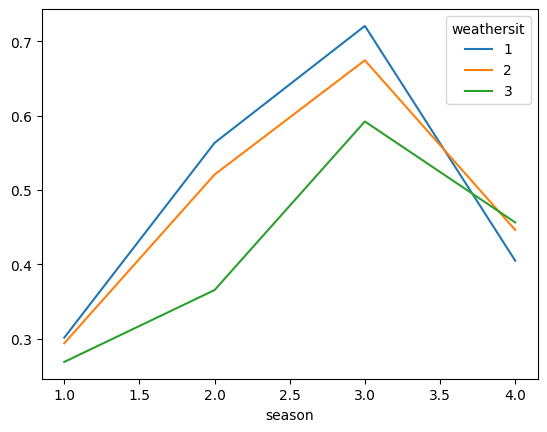

In [ ]:
(bike
 .groupby(['season', 'weathersit'])
 .agg('mean')
 .temp
 .unstack()
 .plot
 .line()
)

In [83]:
#bike.dteday=pd.to_datetime(bike.dteday)
#bike.info()
#bike.dteday.dt.month
#bike=bike.set_index('dteday')
display(bike)

z=(bike
.loc[bike.index.year == 2012]
.groupby(['season'])
.workingday
.agg(sum)
.pipe(lambda x: x.div(x.sum()))

 )

display(z)
#for key, item in z:
#    print(z.get_group(key), "\n\n")


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
2012-12-28,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
2012-12-29,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341


season
1    0.240
2    0.256
3    0.260
4    0.244
Name: workingday, dtype: float64

In [84]:
range(4,9)

range(4, 9)

In [86]:
print(sum(range(4,10
                )))

39


In [87]:
0A40-E021

SyntaxError: invalid decimal literal (1484332019.py, line 1)

In [88]:
string='ppy!'
fruit='a'.join(list(string))
print(fruit)

papaya!


In [89]:
for i in range(3):
    print(i)

0
1
2


In [91]:
squares=[1,4]
print(squares[:]+[9,16])

[1, 4, 9, 16]


In [92]:

x=5//-3.8 *4
print(x)

-8.0


In [93]:
print("""
A
B
C
"""=="\nA\nB\nC\n")

True


In [2]:
x=51%3
print(x)

0


In [9]:
s='terfinx'
s=''.join(sorted(list(s)[3:7])+list(s)[0:3])
print(s)

finxter


In [11]:
x='silent'
print(x[2]+x[1]+x[0]+x[5]+x[3]+x[4])

listen


In [13]:
print(bin(99)[2:11])

1100011


In [14]:
a,b,c,d=True,True,True,False

if b and not d and a and not b:
    if b or a:
        print('42')
    elif d and c:
        print('yes')
    print('yes')
elif d and c or b:
    if b and not d or d:
        print('python')
    print('yes')
else:
    print('42')

python
yes


In [15]:
a,b,c,d=True,True,True,False

if b and not d and a and not b:
    if b or a:
        print('42')
    elif d and c:
        print('yes')
    print('yes')
elif d and c or b:
    if b and not d or d:
        print('python')
    print('yes')
else:
    print('42')

python
yes


In [17]:
squares=[1,4,9,16,25]
print(squares[-3:])

[9, 16, 25]


In [18]:
item_prices=[
('apple',0.45),
('banana',0.75),
('kiwi',0.5),
('orange',0.8)

]

prices=[price for item, price in item_prices]
print(sum(prices))

2.5


In [7]:
word ="Oxbrotherxwhere art thou?"
print(word[9:1:-1])

xrehtorb


In [8]:
a=[[1,2],[3,4]]
print(sum(a,[]))

[1, 2, 3, 4]


In [9]:
words=['cat','mouse']
for w in words:
    print(len(w))

3
5


In [12]:
xs=[[1,2],[3,4]]
ys=list(xs)
print(xs is ys)

False


In [11]:
print(xs is ys)

False


In [13]:
t1=5+2==7
f1=2-1>3
r = t1 or False
r =r and True and f1
print(r)

False


In [15]:
a=['Mary','had','a','lamb']
for i in range(len(a)):
    print(a[i])

Mary
had
a
lamb


In [17]:
names=['Alice','Bob','Charlie']
ages=[25,26,27]
result=dict(zip(names,ages))
print(result)

{'Alice': 25, 'Bob': 26, 'Charlie': 27}


In [18]:
def fib(n):
    a,b=0,1
    while a<n:
        print(a,end=' ')
        a,b = b,a+b
    print()
fib(5)


0 1 1 2 3 


In [19]:
n=16
x=0
while x<3:
    n/=2
    x+=1

print(n)

2.0


In [21]:
def swap(a,b):
    return b,a

a,b=1,2
a,b = swap(a,b)

print(a-b)

1


In [22]:
my_list=[11,22,33,44,55]
del my_list[:]
print(my_list)

[]


In [23]:
numbers=[1,2,3,4,5]
squares=[n**2 for n in numbers if n %2 ==1]
print(squares)

[1, 9, 25]


In [24]:
cubes=[1,8,27,65,125]
cubes[3]=4**3
print(cubes)

[1, 8, 27, 64, 125]


In [30]:
def bubblesort(lst):
    for passes_left in range(len(lst)-1,0,-1):
        for index in range(passes_left):
            if lst[index]>lst[index+1]:
                lst[index],lst[index+1]=lst[index+1],lst[index]
    return lst

l=[27,0,71,70,27,63,90]
print(bubblesort(l))

[0, 27, 27, 63, 70, 71, 90]


In [31]:
t=[3,4,2,1]
x=sorted(t)

print(x)

[1, 2, 3, 4]


In [37]:
nums=[1,2,3]
print(nums)

print(nums[:])

nums.append(nums[:])
print(nums)

print(len(nums))

[1, 2, 3]
[1, 2, 3]
[1, 2, 3, [1, 2, 3]]
4


In [40]:
xs=[1,5,3,7,2,8,4,6]
y=0

for x in xs:
    if x<y:
        y=x

print(min(xs))
print(y)

print(min(xs)==y)

1
0
False


In [1]:
s1="Ronaldo is better than Messi"
print(s1.find("Ronaldo"))
print(s1.find("Football"))
print(s1.find("Messi"))


0
-1
23


In [3]:
xs=[[1,2],[3,4]]
ys=list(xs)
print(xs[0] is ys[0])

True


In [4]:
pairs=[(1,'one'),
       (2,'two'),
       (3,'three'),
       (4,'four')]
pairs.sort(key=lambda pair:pair[1])
print(pairs[0][1])

four


In [6]:
def fibo(n):
    result=[]
    a,b=0,1
    while a<n:
        result.append(a)
        a,b = b,a+b
    return result
fib100=fibo(100)
print(fib100[-1]==
      fib100[-2]+fib100[-3])

True


In [3]:
customers=['Alice','Bob','Frank','Ann']
indices_of_A=[customers.index(x) for x in customers if x[0]=='A']
print([customers[i] for i in indices_of_A])


['Alice', 'Ann']


In [4]:
squares=[1,4,9,1,25]
print(squares[0])

1


In [7]:
a=int('10110',2)
b=int('11100',2)
bin(a&b)

'0b10100'

In [11]:
def levenshtein(a,b):
    if not a: return len(b)
    if not b: return len(a)
    return min(levenshtein(a[1:],b[1:])+(a[0]!=b[0]),
               levenshtein(a[1:],b)+1, levenshtein(a,b[1:])+1)

print(levenshtein('xkcd','cool'))

4


In [12]:
x='py' 'thon'
print(x)

python
